## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

mouse_metadata_df.head()

In [ ]:
study_results_df.head()

In [ ]:
# Combine the data into a single dataset

combined_dataset_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how = "outer")

# Display the data table for preview
combined_dataset_df.head()

In [ ]:
###############
combined_dataset_df.shape

In [ ]:
# Checking the number of mice.
#combined_dataset_df["Mouse ID"].count()

len(combined_dataset_df["Mouse ID"].unique())


In [ ]:
##############number of duplicate rows
combined_dataset_df.duplicated().sum()


In [ ]:
##############combined_dataset_df.loc[combined_dataset_df.duplicated(), :]


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicateDFRow = combined_dataset_df[combined_dataset_df.duplicated(["Mouse ID", "Timepoint"])]
#duplicateDFRow = combined_dataset_df[combined_dataset_df.duplicated(subset = None, keep = 'first')]

print(duplicateDFRow)
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
#https://appdividend.com/2020/03/07/python-pandas-find-duplicate-rows-in-dataframe-based-on-all-or-selected-columns/

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_dataset_df.loc[combined_dataset_df.duplicated(), :]

#dataschool youtube                                      
                                      
#print(duplicate_mouse)

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#combined_dataset_df.drop_duplicates(keep = False).shape
#clean_combined_dataset_df = combined_dataset_df[combined_dataset_df['Mouse ID'].drop_duplicates(keep = False)]                                                                                            
clean_combined_dataset_df = combined_dataset_df.drop_duplicates() #("Mouse ID")
#clean_combined_dataset_df = combined_dataset_df.drop_duplicates()
#clean_combined_dataset_df =                                                 #df.drop_duplicates()
  #df.drop_duplicates()                                              
#clean_combined_dataset_df.head()
combined_dataset_df.head()
clean_combined_dataset_df.shape


In [ ]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_dataset_df["Mouse ID"].unique())

In [ ]:
clean_combined_dataset_df.columns

In [ ]:
clean_combined_dataset_df.head()


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_mean = clean_combined_dataset_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_median = clean_combined_dataset_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_variance = clean_combined_dataset_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_std_dv = clean_combined_dataset_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_sem = clean_combined_dataset_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame({"Mean": summary_mean, "Median": summary_median, "Variance": summary_variance,
                                  "Standard Deviation": summary_std_dv, "Standard Error of the Mean": summary_sem})

summary_stats_df.head(2)
#

In [ ]:
# help(clean_combined_dataset_df.groupby("Drug Regimen").agg)


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg_df = clean_combined_dataset_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var",
                                                                                                     "std", "sem"]
                                                                              }                                                                                                                                          )
summary_stats_agg_df.head()


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

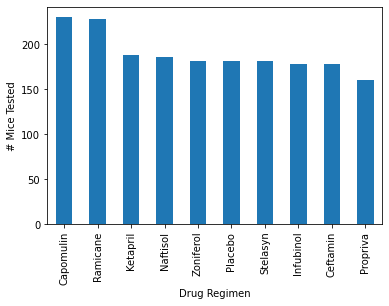

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepts = clean_combined_dataset_df["Drug Regimen"].value_counts()
timepts.plot(kind = 'bar')
###
plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

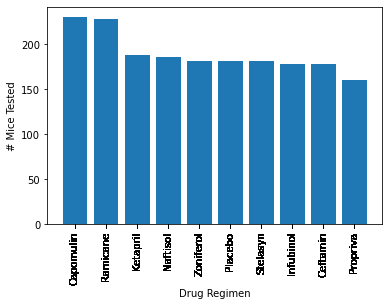

In [165]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepts = clean_combined_dataset_df["Drug Regimen"].value_counts()
plt.bar(timepts.index.values, timepts.values)
###
plt.xlabel("Drug Regimen")
plt.xticks(clean_combined_dataset_df["Drug Regimen"],rotation="vertical")
plt.ylabel("# Mice Tested")
plt.show

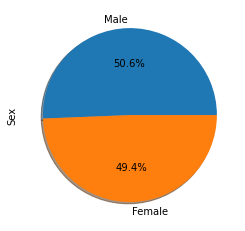

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dist = clean_combined_dataset_df.Sex.value_counts()
dist.plot(kind="pie", autopct='%1.1f%%', shadow=True)
plt.show()

([<matplotlib.patches.Wedge at 0x26b8cf8c3c8>,
 [Text(-0.02191655480551976, 1.0997816440664288, 'Males'),
  Text(0.02191645183653077, -1.0997816461183998, 'Females')],
 [Text(-0.011954484439374413, 0.5998808967635065, '50.6%'),
  Text(0.011954428274471329, -0.5998808978827634, '49.4%')])

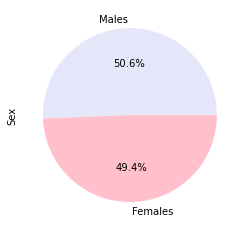

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist = clean_combined_dataset_df.Sex.value_counts()
labels = ("Males","Females")
colors = ("Lavender","Pink")
plt.ylabel("Sex")
plt.pie(dist.values, labels = labels, colors=colors, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_tumor = clean_combined_dataset_df.groupby(["Mouse ID"])["Timepoint"].max()



# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data_df = pd.merge(clean_combined_dataset_df, last_tumor, on=["Mouse ID", "Timepoint"], how = "right")


                            

In [180]:
 
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes   For 
for drugs in treatments:
    
    tumor_volume = merged_data_df.loc[merged_data_df["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(tumor_volume)    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    ## outlier < or > 
    outlier = tumor_volume[(tumor_volume < lower_bound) | 
    (tumor_volume > upper_bound)]
    print(f"{drugs} potential outliers: {outlier}")

    #see summary stats 3.3 3.2 

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [181]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




## Line and Scatter Plots

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen




